<a href="https://colab.research.google.com/github/IsuruLakshan170/ANN_Model/blob/main/ANN_Model_Isuru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Install Library

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import dataset

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/FYR/CustomerChurnDataSet.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6525,2400-FEQME,Male,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.50,1177.95,No
2465,1740-CSDJP,Male,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),35.25,35.25,Yes
3694,1150-WFARN,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.75,7156.2,Yes
5255,8486-AYEQH,Female,0,No,No,31,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.05,2227.8,No
3862,5854-KSRBJ,Male,0,Yes,Yes,70,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1782.05,No


First of all, drop customerID column as it is of no use



# Data Analysis and Preprosesing

In [ ]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.iloc[488].TotalCharges

' '

In [ ]:
df[df.TotalCharges!=' '].shape

(7032, 20)

Remove rows with space in TotalCharges

In [ ]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Data Visualization



/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


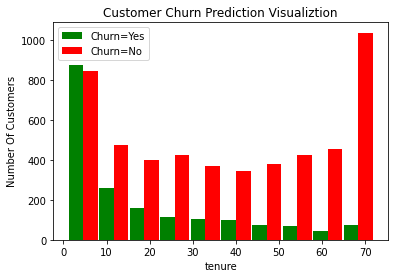

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

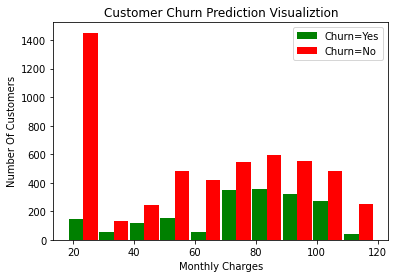

In [ ]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Many of the columns are yes, no etc.Print unique values in object columns to see data values

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Convert Yes and No to 1 or 0

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df1.gender.unique()

array([1, 0])

One hot encoding for categorical columns



In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3820,0,1,1,0,72,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3155,0,0,0,1,29,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5467,1,0,0,0,53,1,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
3318,0,0,0,0,10,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4006,0,0,1,1,72,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
#convert larger variations data set columns into, from 0 to 1 variation
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [ ]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Save processed dataset

In [ ]:
import pandas as pd

#save as csv file
df2.to_csv('ProcessedDataSet.csv', index=False)


In [ ]:
#download file
from google.colab import files
files.download("ProcessedDataSet.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Building

Import Processed Dataset

In [ ]:
data = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/FYR/ProcessedDataSet.csv')
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
170,0,0,1,0,0.591549,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
509,0,1,1,1,0.267606,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
5252,0,1,1,0,0.746479,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1126,0,0,1,1,0.352113,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3486,1,0,0,0,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


Train test split



In [ ]:
X = data.drop('Churn',axis='columns')
y = data['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5655,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2616,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1323,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3601,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2768,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1931,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5378,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4324,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
len(X_train.columns)

26

In [ ]:
y_train[:10]

5655    1
101     0
2616    0
392     0
1323    1
3601    0
2768    0
1931    0
5378    0
4324    0
Name: Churn, dtype: int64

Build a model (ANN) in tensorflow/keras

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3)

Epoch 1/3
176/176 [==============================] - 1s 3ms/step - loss: 0.4995 - accuracy: 0.7650
Epoch 2/3
176/176 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7972
Epoch 3/3
176/176 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8002


Testing model

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7854


[0.44148245453834534, 0.7853589057922363]

Predictions

In [ ]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.17542729],
       [0.3725832 ],
       [0.02628913],
       [0.70188576],
       [0.5364412 ]], dtype=float32)

Round off predicted values into 1 and 0

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [ ]:
y_test[:10]
# we can see some predicted values are not match with test values

2655    0
743     0
5570    1
64      1
3282    1
814     1
2665    0
5911    0
1020    0
6078    0
Name: Churn, dtype: int64

Get accuracy from predicted values

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', acc)

Accuracy: 0.7853589196872779


# Project Start Here

Import dataset

In [ ]:
import numpy as np
import pandas as pd

dataSet = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/FYR/ProcessedDataSet.csv')
dataSet.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2719,0,0,1,1,0.859155,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3616,1,0,1,1,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
5512,0,0,0,0,0.816901,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2055,0,0,1,1,0.985915,1,1,1,1,1,...,1,0,0,0,0,1,0,0,1,0
3313,0,0,0,0,0.126761,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
X = dataSet.drop('Churn',axis='columns')
y = dataSet['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

import library

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model


Dataset spliting

In [ ]:
X_train.shape, X_test.shape

sizeStart=0
sizeEnd =2000

x_train_model_1= X_train[sizeStart:sizeEnd]
y_train_model_1 = y_train[sizeStart:sizeEnd]

sizeStart=0
sizeEnd =400

x_test_model_1 = X_test[sizeStart:sizeEnd]
y_test_model_1 = y_test[sizeStart:sizeEnd]


sizeStart=2000
sizeEnd =4000

x_train_model_2= X_train[sizeStart:sizeEnd]
y_train_model_2 = y_train[sizeStart:sizeEnd]

sizeStart=400
sizeEnd =800

x_test_model_2 = X_test[sizeStart:sizeEnd]
y_test_model_2 = y_test[sizeStart:sizeEnd]


sizeStart=0
sizeEnd =4000

x_train_model_new= X_train[sizeStart:sizeEnd]
y_train_model_new = y_train[sizeStart:sizeEnd]

sizeStart=0
sizeEnd =800

x_test_model_new = X_test[sizeStart:sizeEnd]
y_test_model_new = y_test[sizeStart:sizeEnd]


In [ ]:
x_train_model_1[:3]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5655,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2616,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
x_train_model_2[:3]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4426,1,0,1,0,0.211268,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
591,0,0,1,1,0.873239,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
166,1,0,0,0,0.042254,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [ ]:
x_test_model_1[:3]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2655,0,0,0,1,0.169014,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
743,1,0,0,0,0.056338,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5570,1,0,1,1,0.971831,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
x_test_model_2[:3]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5806,0,1,0,0,0.112676,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
238,1,1,0,0,0.140845,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5368,0,0,0,0,0.042254,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


Test Model accuracy when two times train using different datasets

In [133]:
testModel_1 =build_model()
testModel_1.fit(x_train_model_1, y_train_model_1, epochs=1)
# testModel_1.fit(x_train_model_2, y_train_model_2, epochs=1)

63/63 [==============================] - 1s 3ms/step - loss: 0.5768 - accuracy: 0.7365


In [134]:
testModel_1 =build_model()
# testModel_1.fit(x_train_model_1, y_train_model_1, epochs=1)
testModel_1.fit(x_train_model_2, y_train_model_2, epochs=1)

63/63 [==============================] - 1s 2ms/step - loss: 0.5781 - accuracy: 0.7145


In [135]:
testModel_1 =build_model()
testModel_1.fit(x_train_model_1, y_train_model_1, epochs=1)
testModel_1.fit(x_train_model_2, y_train_model_2, epochs=1)

# ---- we can understand model has traned secod dataset without loosing first trined data ----

63/63 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.7715



 Models build and train

In [ ]:
#build model 1 train 
model_1 =build_model()

model_1.fit(x_train_model_1, y_train_model_1, epochs=1)
#in here we can trained angain trained model it upgrade it performance
# model_1.fit(x_train_model_2, y_train_model_2, epochs=1)

#build model 2 train 
model_2 =build_model()
model_2.fit(x_train_model_2, y_train_model_2, epochs=5)

#build new model train 
model_new =build_model()
model_new.fit(x_train_model_new, y_train_model_new, epochs=8)


63/63 [==============================] - 1s 3ms/step - loss: 0.6018 - accuracy: 0.7190
Epoch 1/5
63/63 [==============================] - 1s 3ms/step - loss: 0.6064 - accuracy: 0.6950
Epoch 2/5
63/63 [==============================] - 0s 3ms/step - loss: 0.4616 - accuracy: 0.7685
Epoch 3/5
63/63 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.7985
Epoch 4/5
63/63 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8030
Epoch 5/5
63/63 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8040
Epoch 1/8
125/125 [==============================] - 1s 2ms/step - loss: 0.5216 - accuracy: 0.7515
Epoch 2/8
125/125 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.7993
Epoch 3/8
125/125 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8023
Epoch 4/8
125/125 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8055
Epoch 5/8
125/125 [=============

In [ ]:
model_1.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 26)                702       
                                                                 
 dense_98 (Dense)            (None, 15)                405       
                                                                 
 dense_99 (Dense)            (None, 10)                160       
                                                                 
 dense_100 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1,278
Trainable params: 1,278
Non-trainable params: 0
_________________________________________________________________


Test dataset 1

In [ ]:
model_1.evaluate(x_test_model_1, y_test_model_1)

13/13 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7350


[0.5575135946273804, 0.7350000143051147]

In [ ]:
model_2.evaluate(x_test_model_1, y_test_model_1)

13/13 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7825


[0.4329407811164856, 0.7825000286102295]

In [ ]:
model_new.evaluate(x_test_model_1, y_test_model_1)

13/13 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7925


[0.42413005232810974, 0.7925000190734863]

Test dataset 2

In [ ]:
model_1.evaluate(x_test_model_2, y_test_model_2)

13/13 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7000


[0.5915794968605042, 0.699999988079071]

In [ ]:
model_2.evaluate(x_test_model_2, y_test_model_2)

13/13 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7800


[0.4623348116874695, 0.7799999713897705]

In [ ]:
model_new.evaluate(x_test_model_2, y_test_model_2)

13/13 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7925


[0.453124076128006, 0.7925000190734863]

Test dataset 3

In [ ]:
model_1.evaluate(x_test_model_new, y_test_model_new)

25/25 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7175


[0.5745465755462646, 0.7174999713897705]

In [ ]:
model_2.evaluate(x_test_model_new, y_test_model_new)

25/25 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7812


[0.44763779640197754, 0.78125]

In [ ]:
model_new.evaluate(x_test_model_new, y_test_model_new)

25/25 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7925


[0.43862712383270264, 0.7925000190734863]

# Model Parameters segmentation and aggregation

Test model 1 accuracy

In [ ]:
model_1.evaluate(x_test_model_1, y_test_model_1)

13/13 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7350


[0.517017662525177, 0.7350000143051147]

In [ ]:
#get model 1 parameters
parameters_model_1 = model_1.get_weights()

# Divide the model parameters into 4 segments
segment1 = parameters_model_1[:2]
segment2 = parameters_model_1[2:4]
segment3 = parameters_model_1[4:6]
segment4 = parameters_model_1[6:]


In [ ]:
# create model 6
model_6 =build_model()

# Set the parameters of the model 6 to the values of the segments
model_6.set_weights(segment1 + segment2 + segment3 + segment4)
model_6.evaluate(x_test_model_1, y_test_model_1)
# ----- we can see after concatanate the model segments the accuray will as model 1 accuray -----

13/13 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7350


[0.517017662525177, 0.7350000143051147]

# Model Paramters aggregations

Averaging the weights of two models can sometimes lead to better performance, as it can help to reduce overfitting by combining the strengths of multiple models. However, it can also lead to worse performance if the two models have very different strengths or if one of the models is overfitting.

Get model 1 parameters and set to new model 4 paramters check validation

In [ ]:
# Obtain the model  parameters
# model.get_weights() method, which returns a list of Numpy arrays containing the "weights" and "biases" of the model. 
#The length of the list is equal to the number of layers in the model.
# weights will be a list containing the weights and biases of all layers in the model.

parameters_model_1 = model_1.get_weights()
parameters_model_2 = model_2.get_weights()


In [ ]:
# create model 4
model_4 =build_model()

# Set the parameters of the model 1 to model 4
model_4.set_weights(parameters_model_1)
 
 #test validations
model_4.evaluate(x_test_model_new, y_test_model_new)
# ---- accuracy same not change ----

25/25 [==============================] - 1s 8ms/step - loss: 0.5456 - accuracy: 0.7175


[0.5455864071846008, 0.7174999713897705]

Aggregate two model parameters set to model 5

In [ ]:
# Aggregate the parameters by summing them

# Aggregation method 1
# aggregated_params = [(p1 + p2) for p1, p2 in zip(parameters_model_1, parameters_model_2)]

# Aggregation method 2
# # aggregate the weights
# aggregated_weights = []
# for w1, w2 in zip(parameters_model_1, parameters_model_2):
#     aggregated_weights.append(w1 + w2)

# # Aggregation method 3
# averaged_weights = [(w1 + w2) / 2 for w1, w2 in zip(parameters_model_1, parameters_model_2)]

# # Aggregation method 4 - weighted average
averaged_weights = [(w1*0.5 + w2*0.5 ) / 2 for w1, w2 in zip(parameters_model_1, parameters_model_2)]

# create model 5
model_5 =build_model()

# Set the aggregated parameters to the new model
model_5.set_weights(averaged_weights)


In [ ]:
 #test validations
model_5.evaluate(x_test_model_1, y_test_model_1)
# ----- the accuracy will come to middle of that two accuracy ?????-----

13/13 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.7350


[0.6820365190505981, 0.7350000143051147]

In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 26)                702       
                                                                 
 dense_26 (Dense)            (None, 15)                405       
                                                                 
 dense_27 (Dense)            (None, 10)                160       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,278
Trainable params: 1,278
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 26)                702       
                                                                 
 dense_30 (Dense)            (None, 15)                405       
                                                                 
 dense_31 (Dense)            (None, 10)                160       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,278
Trainable params: 1,278
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 26)                702       
                                                                 
 dense_42 (Dense)            (None, 15)                405       
                                                                 
 dense_43 (Dense)            (None, 10)                160       
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,278
Trainable params: 1,278
Non-trainable params: 0
_________________________________________________________________


Another method for aggregations

In [ ]:
from keras.models import Sequential

# create a new model with the same architecture as the first two models
# model3 = Sequential()
model_7 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])
  
for layer1, layer2 in zip(model_1.layers, model_1.layers):
    model_7.add(layer1)

# load the weights of the first two models into the new model
model_7.load_weights(model_1.get_weights(), by_name=True)
model_7.load_weights(model_2.get_weights(), by_name=True)

ValueError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

X = dataSet.drop('Churn',axis='columns')
y = dataSet['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

# create first model
model1 = Sequential()
model1.add(Dense(26, input_shape=(26,), activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=10, batch_size=32)

# create second model
model2 = Sequential()
model2.add(Dense(26, input_shape=(26,), activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# create third model with the same architecture as the first two models
model3 = Sequential()
for layer1, layer2 in zip(model1.layers, model2.layers):
    model3.add(layer1)

# load the weights of the first two models into the new model
model3.load_weights(model1.get_weights(), by_name=True)
model3.load_weights(model2.get_weights(), by_name=True)

# evaluate the third model on test data
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)


Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7093
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7403
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7403
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7403
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7403
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7403
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7403
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7403
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7403
Epoch 10/10
176/176 [==============================] - 0s 2ms/st

AttributeError: ignored